In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import kneighbors_graph
data_fifa= pd.read_csv("fifa_20.csv")
df= data_fifa[["mentality_interceptions", "power_long_shots"]]

In [2]:
df.head()

,mentality_interceptions,power_long_shots
0,40,94
1,29,93
2,36,84
3,19,12
4,41,80


## 1 Density-based clustering: DBSCAN

In the last exercise we learned about the centroid-based clustering algorithm K-Means. In this exercise we will compare it with the density-based clustering algorithm DBSCAN, the agglomerative hierarchical clustering and the hierarchical density-based clustering algorithm OPTICS. We use the features ``mentality_interceptions`` and ``power_long_shots``.

For now we will have a look at DBSCAN.  
To do so, estimate a suitable value for $\epsilon$.
Set *MinPts=30* (necessary because the data is relativaly dense and low dimensional) and use a k-distance plot for estimating a proper range for $\epsilon$. For creating this plot, we propose the following steps:
- use the *kneighbors_graph()* function of sklearn for getting the distance of each point to its $k$ (*MinPts*) neighbors <br>
(http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html)
- convert the result to a 2d array
- get the maximum of each row
- sort these values and create the plot

In [3]:
# Follow the suggested steps to plot a k-distance plot. 
A = kneighbors_graph(df, 30, mode='distance', include_self=True)
A.toarray()

/home/akshat/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


array([[ 0.        , 11.04536102, 10.77032961, ...,  0.        ,
         0.        ,  0.        ],
       [11.04536102,  0.        , 11.40175425, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [4]:
A.shape

(18278, 18278)

In [6]:
max_each_row=[]
for i in range(A.shape[0]):
    max_each_row.append( A[i].max())
max_each_row

[13.341664064126334,
 13.038404810405298,
 5.0,
 1.0,
 3.1622776601683795,
 10.0,
 1.4142135623730951,
 7.0,
 4.47213595499958,
 5.656854249492381,
 2.23606797749979,
 13.038404810405298,
 6.4031242374328485,
 1.4142135623730951,
 3.605551275463989,
 9.486832980505138,
 7.211102550927978,
 6.324555320336759,
 6.324555320336759,
 6.324555320336759,
 5.0,
 8.0,
 4.47213595499958,
 6.4031242374328485,
 5.0,
 2.0,
 2.23606797749979,
 9.219544457292887,
 1.0,
 8.06225774829855,
 1.0,
 3.605551275463989,
 1.4142135623730951,
 2.23606797749979,
 3.1622776601683795,
 6.708203932499369,
 6.324555320336759,
 7.211102550927978,
 3.605551275463989,
 2.8284271247461903,
 6.708203932499369,
 3.0,
 7.0,
 9.486832980505138,
 8.06225774829855,
 7.615773105863909,
 2.23606797749979,
 7.0710678118654755,
 3.1622776601683795,
 8.06225774829855,
 7.0,
 4.0,
 4.123105625617661,
 1.0,
 6.708203932499369,
 3.0,
 7.211102550927978,
 7.211102550927978,
 4.123105625617661,
 6.0,
 1.0,
 2.23606797749979,
 6.0,
 2

In [7]:
max_each_row.sort()

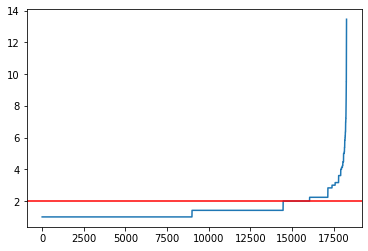

In [13]:
plt.plot(max_each_row)
plt.axhline(y=2, c='r')

Use the estimated parameter range for DBSCAN (http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). Visualize the result. Adjust the parameters to get better results and create one plot with and one without the detected noise (it has cluster label < 0).

In [14]:
# Run DBSCAN
db_scan= DBSCAN(eps=2, min_samples=30)
model= db_scan.fit(df)
labels= model.labels_

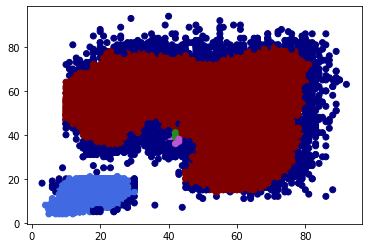

In [15]:
# Visualization with noise
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df["mentality_interceptions"], df["power_long_shots"], c=vectorizer(labels))


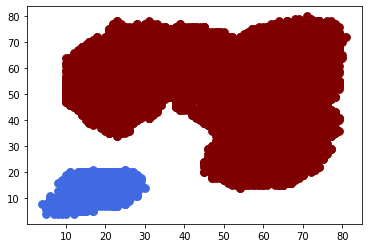

In [18]:
# Visualization without noise
df1= df.copy()
df1['cluster']= labels
plt.scatter(df1[df1['cluster']==0]['mentality_interceptions'], df1[df1['cluster']==0]['power_long_shots'], s = 60, c = 'royalblue', label = 'Cluster1')
plt.scatter(df1[df1['cluster']==1]['mentality_interceptions'], df1[df1['cluster']==1]['power_long_shots'], s = 60, c = 'maroon', label = 'Cluster2')

# 2 Agglomerative Hierarchical Clustering

Secondly we will look at agglomerative hierarchical clustering.  
Use the sklearn implementation of agglomerative clustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) to cluster the same data as before. Try different numbers of clusters (the parameter n_clusters) and see which work well.  
Visualize the resulting clusters with a scatterplot.


In [20]:
# Run Agglomerative Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2).fit(df)

In [208]:
clustering
agglo_labels= clustering.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

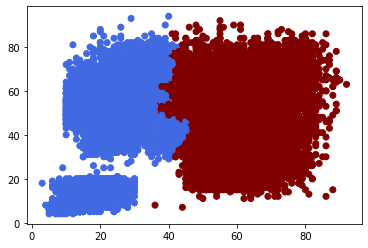

In [204]:
# Visualization
plt.scatter(df["mentality_interceptions"], df["power_long_shots"], c=vectorizer(agglo_labels))

In [207]:
clustering

AgglomerativeClustering()

0.432416463697002
0.4700132627899583
0.47948923315555475
0.42120701179845454
0.38360477476432614
0.3579382701293671
0.3430307634141493
0.3323490745460809
0.31886715749495687
0.32012452562456545
0.3096232837535578
0.308741092222655
0.3197510827878105


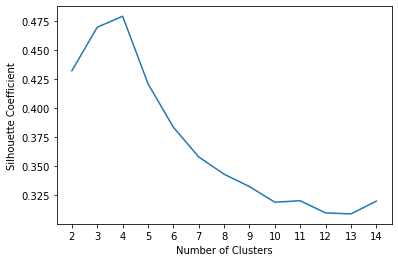

In [23]:
l=range(2,15)
from sklearn.metrics import silhouette_score
sil_coeff=[]
for i in l:
    clustering = AgglomerativeClustering(n_clusters=i).fit(df)
    agglo_labels= clustering.labels_
    score = silhouette_score(df, agglo_labels, metric='euclidean')
    print(score)
    sil_coeff.append(score)

plt.plot(l, sil_coeff)
plt.xticks(l)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

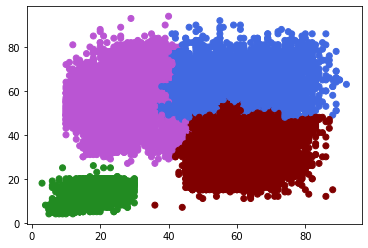

In [29]:
clustering1 = AgglomerativeClustering(n_clusters=4).fit(df)
agglo_labels1= clustering1.labels_
plt.scatter(df["mentality_interceptions"], df["power_long_shots"], c=vectorizer(agglo_labels1))

# 3 Hierarchical Density-based Clustering: OPTICS

The last clustering algorithm we will look at is OPTICS.  
Use the sklearn implementation of OPTICS (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html) to cluster the same data as before. Set the min_samples to 30 and use a min_cluster_size of 0.05.  
Plot the resulting clusters with and without noise. Noise can be identified the same as in DBSCAN (label of the cluster is < 0). 

**NOTE:** OPTICS may take some time to process. Don't be alarmed if your code takes a minute or two to calculate the clusters.

In [27]:
# Run Optics
from sklearn.cluster import OPTICS
clustering_optics = OPTICS(min_samples=30, min_cluster_size= 0.05).fit(df)
clustering_optics.labels_

array([-1, -1, -1, ..., -1, -1, -1])

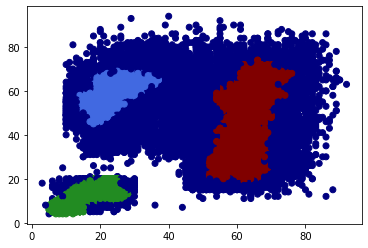

In [228]:
# Visualization with noise
plt.scatter(df["mentality_interceptions"], df["power_long_shots"], c=vectorizer(clustering_optics.labels_))

In [229]:
set(clustering_optics.labels_)

{-1, 0, 1, 2}

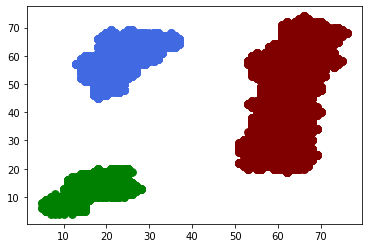

In [230]:
# Visualization without noise
df2= df.copy()
df2['cluster']= clustering_optics.labels_
plt.scatter(df2[df2['cluster']==0]['mentality_interceptions'], df2[df2['cluster']==0]['power_long_shots'], s = 60, c = 'royalblue', label = 'Cluster1')
plt.scatter(df2[df2['cluster']==1]['mentality_interceptions'], df2[df2['cluster']==1]['power_long_shots'], s = 60, c = 'maroon', label = 'Cluster2')
plt.scatter(df2[df2['cluster']==2]['mentality_interceptions'], df2[df2['cluster']==2]['power_long_shots'], s = 60, c = 'green', label = 'Cluster3')